In [1]:
import pandas as pd
import re

In [2]:
data = pd.read_csv("OkadaBan_Cleaned.csv")

In [3]:
data.head()

,created_at,reply_count,retweet_count,favorite_count,quote_count,text,screen_name,followers_count
0,Tue Feb 04 07:30:59 +0000 2020,0,0,0,0,"Dear Lagosians, kindly stay safe out there. Do...",Hawt_Carter,524
1,Tue Feb 04 07:31:01 +0000 2020,0,0,0,0,"As we drill @jidesanwoolu on #LagosOkadaBan, a...",sarafa_j,470
2,Tue Feb 04 07:31:09 +0000 2020,0,0,0,0,"Dear Lagosians, kindly stay safe out there. Do...",OluwapelumiOhu,165
3,Tue Feb 04 07:31:33 +0000 2020,0,0,0,0,"Dear Lagosians, kindly stay safe out there. Do...",MsLena293,13
4,Tue Feb 04 07:31:50 +0000 2020,0,0,0,0,So Klobuchar who was the only candidate to tre...,goodmorninchirp,42


In [53]:
data["interactions"] = data.reply_count + data.retweet_count + data.favorite_count + data.quote_count

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

C:\Users\NiniolaAdegboyega\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\NiniolaAdegboyega\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


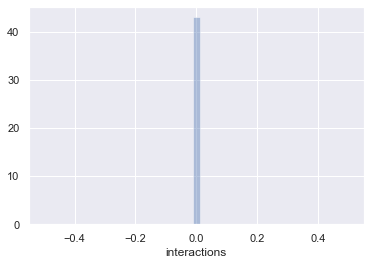

In [55]:
sns.distplot(data.interactions)

In [4]:
data.drop_duplicates(inplace=True)

In [5]:
data = data.loc[data.text.str.contains("Dear Lagosians, kindly stay safe out there").eq(False)]

In [6]:
data = data.loc[data.text.str.contains("Jigawa").eq(False)]

In [7]:
data.reset_index(drop=True, inplace=True)

In [8]:
data.text.sample(n=5).to_dict()

{900: 'So my Mum sent me to get some Fruits today, no okada, no keke...so I had to trek from Ojota to Ketu.\n\nI got there &amp; the people who sold Fruits hadnt even arrived. I guess they were trekking too😂\n\nI went back home without getting them.\n\nIt was indeed a FRUITLESS Journey.\n\n#Lagos https://t.co/ejJIVCXaPV',
 1818: 'PRASHAR LAKE TREK \nBEST Price: 2300/- Per Person for 1N/2D\n\nBooking Open for B2B, Solo, Group, School, Corporate Groups.\nFrom Booking call or WhatsApp 9971214881\n#Prashar #Prasharlake #prasharlaketrek #himachal #panarsa #mandi #jwalapur #adventurephunk #indiantrekkersclub #nature https://t.co/Qb0rrcGqfB',
 2008: 'I trekked from ọgbà to Ikeja today, nice one Sanwo olu, nice one',
 603: "@mimidimplez Yes o,I trekked from VI to Allen,let's just thank God for life.",
 1114: 'It’s been a really long day already for Lagosians,compensate yourself with decent and affordable meals from @warachowhq \nEach frame goes for 3000, free drink+free delivery in VI,Lekki,Ip

# Named Entity Recognition

In [9]:
pattern = re.compile(r"(?:(?<=trekked from\s)|(?<=trek from\s)|(?<=trekking from)).*?(?=\s\bto\b)")

In [10]:
def re_search(text, pat=pattern):
    try:
        temp = pat.search(text)
        return temp.group()
    except AttributeError:
        return ""

In [11]:
data.loc[:, "from_re"] = data.text.apply(re_search)

In [12]:
data.from_re.sample(n=5)

1462    Dopemu under bridge
367                      DC
1176                 Oshodi
343                    Ajah
875                   Agege
Name: from_re, dtype: object

pattern_2 = re.compile(r"\bto\s*(\w+){0,1}[.]*")  # (?<=to\b\s)(\S*\s*){0,1}

In [17]:
data.from_re.loc[~data.from_re.eq("")].sample(n=5)

634           Agege
173           Ojota
251     Iyana Ipaja
188           Ojota
1177    Ikeja Along
Name: from_re, dtype: object

In [21]:
data.drop(data.loc[data.from_re.eq("DC")].index, axis=0, inplace=True)

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data.shape

(1925, 9)

In [40]:
def return_locations(text):
    
    # splits text by full stop into sentences
    sentences = text.lower().split(".")
    #print(sentences)
    
    # splits sentences by whitspace character 
    for sent in sentences:
        word_list = sent.split()
        
        # check that the sentence contains both "from" and "to" 
        if ("from" in word_list) & ("to" in word_list):
            from_ind = word_list.index("from")
            to_ind = word_list.index("to")
            
            # checks that trek is used in the sentence 
            if ("trek" in word_list) | ("trekked" in word_list) | ("trekking" in word_list):
                #print("yes")
                # checks that from comes before to
                if from_ind < to_ind:
                    try:
                        # collects next two words after to
                        to_word = word_list[to_ind+1: to_ind+3]
                        to_word = " ".join(to_word)
                    except:
                        # if only one words comes before to, collects it
                        to_word = word_list[to_ind+1]
                    # concatenates words between from and to
                    return " ".join(word_list[from_ind+1:to_ind]), to_word
            
                # checks that to comes after from 
                if to_ind < from_ind:
                    try:
                        # collects the next two words after from
                        from_word = word_list[from_ind+1: from_ind+3]
                        from_word = " ".join(word_list)
                    except:
                        # if only one word comes after from, collects it 
                        from_word = word_list[from_ind+1]
                    # concatenates words between from and to
                    return from_word, " ".join(word_list[to_ind+1:from_ind])
            else:
                # if there's no trek in the sentence, continue to next sentence
                continue
        else:
            # if there's no from and to in the sentence, continue to next sentence
            continue

In [43]:
locations = data.text.apply(return_locations)

In [46]:
data["locations_from"] = locations.apply(lambda x: None if x == None else x[0])
data["locations_to"] = locations.apply(lambda x: None if x == None else x[1])

In [52]:
data.locations_from.isna().sum()

497

In [51]:
data.from_re.eq("").sum()

983